In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/717'

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/717')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


In [ ]:
#First we import the data that we need. Here I have used Excel to filter out the dataset as outlined in the assignment then imported the data into Python. You can see attached excel file for more on how data was filtered
# Please note that the excel file that I have uploaded here is a dataset that has aleady been filtered out to fit the assignment on Excel. I am using python for graphing and analysis, and only used excel to filter and sort the data in ascending order. 

sup_curve = pd.read_excel(io="Elec_supply_curve_data.xlsx")
sup_curve.head(5)

,Plant primary coal/oil/gas/ other fossil fuel category,Per Unit Fuel Costs ($/MWh),Plant nameplate capacity (MW),Cumulative capacity (MW)
0,HYDRO,0.0,32.0,32.0
1,HYDRO,0.0,70.0,102.0
2,HYDRO,0.0,105.0,207.0
3,HYDRO,0.0,530.8,737.8
4,HYDRO,0.0,20.0,757.8


In [ ]:
# Used htis command so that I know what the title of each column is for when I have to create the figures
sup_curve.columns

Index(['Plant primary coal/oil/gas/ other fossil fuel category',
       'Per Unit Fuel Costs ($/MWh)', 'Plant nameplate capacity (MW)',
       'Cumulative capacity (MW)'],
      dtype='object')

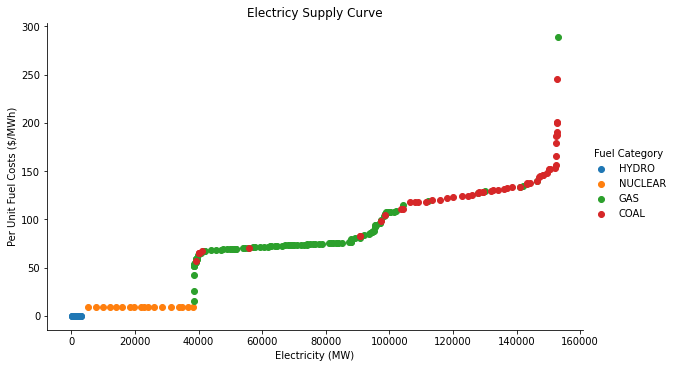

In [ ]:
#Creating a supply curve. I will use cumulative capacity as the x-axis and per unit fuel cost as the y axis. Cumulative capacity was calcualted by summing the nameplate capacity of each generator after they were already ranked from lowest to highest per unit fuel cost.
# Each fuel type or category is shown in a different color as displayed below and shown in the figure legend 
supply_fig = seaborn.FacetGrid(data=sup_curve, hue='Plant primary coal/oil/gas/ other fossil fuel category', height=5, aspect=50/30)
supply_fig.map(plt.scatter, 'Cumulative capacity (MW)', 'Per Unit Fuel Costs ($/MWh)').add_legend(title="Fuel Category")
supply_fig.set(title="Electricy Supply Curve")
supply_fig.set_xlabels(label="Electricity (MW)")

In [ ]:
#Importing an excel file that I have uploaded based from the data that was downloaded from the PJM website 
PJM_demand_df= pd.read_excel(io="PJM_demand_data.xlsx")
PJM_demand_df.columns

Index(['datetime_beginning_utc', 'datetime_beginning_ept', 'area',
       'hrly_da_demand_bid'],
      dtype='object')

Text(0, 0.5, 'Electricity Demanded (MW)')

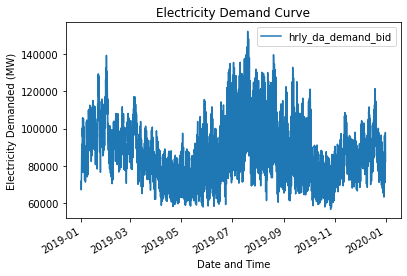

In [ ]:
#Plotting the demand curve from PJM

demand_fig= PJM_demand_df.plot.line(x='datetime_beginning_ept',y='hrly_da_demand_bid')
demand_fig.set(title="Electricity Demand Curve")
plt.xlabel('Date and Time')
plt.ylabel('Electricity Demanded (MW)')

In [ ]:
#Finding the peaks of the demand curve 
PJM_demand_df.nlargest(5,['hrly_da_demand_bid'])

,datetime_beginning_utc,datetime_beginning_ept,area,hrly_da_demand_bid
3967,2019-07-19 21:00:00,2019-07-19 17:00:00,PJM_RTO,152026
3968,2019-07-19 20:00:00,2019-07-19 16:00:00,PJM_RTO,151822
3969,2019-07-19 19:00:00,2019-07-19 15:00:00,PJM_RTO,150869
3966,2019-07-19 22:00:00,2019-07-19 18:00:00,PJM_RTO,150391
3970,2019-07-19 18:00:00,2019-07-19 14:00:00,PJM_RTO,150023


In [ ]:
#Finding the percentiles of the demand curve 
PJM_demand_df['hrly_da_demand_bid'].quantile(q=[0.05,0.1,0.3,0.5,0.7,0.9,1.0])

0.05     64876.2
0.10     69410.5
0.30     79848.2
0.50     86665.0
0.70     95497.1
0.90    111018.3
1.00    152026.0
Name: hrly_da_demand_bid, dtype: float64

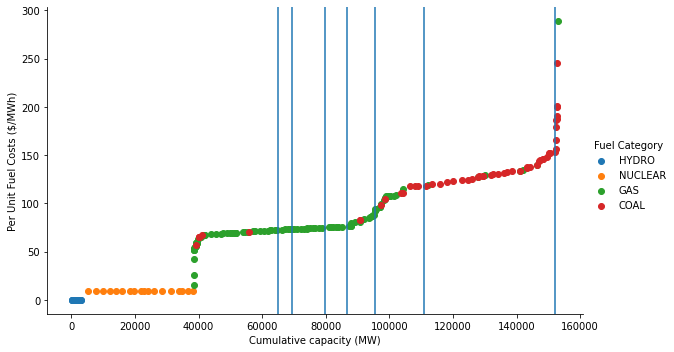

In [ ]:
#Plotting vertical inelastic demand curves against the electricity supply curve 
#The intersection of the demand curve against the suply curve is how we will estimate price

supply_fig_2 = seaborn.FacetGrid(data=sup_curve, hue='Plant primary coal/oil/gas/ other fossil fuel category',height=5, aspect=50/30)
supply_fig_2.map(plt.scatter, 'Cumulative capacity (MW)', 'Per Unit Fuel Costs ($/MWh)').add_legend(title = "Fuel Category")

plt.axvline(x=64876.2)
plt.axvline(x=69410.5)
plt.axvline(x=79848.2)
plt.axvline(x=86665.0)
plt.axvline(x=95497.1)
plt.axvline(x=111018.3)
plt.axvline(x=152026.0)

